# DA5401 A4: GMM-Based Synthetic Sampling for Imbalanced Data

# **Introduction**

Credit card fraud detection is a highly challenging problem due to the extreme imbalance between legitimate and fraudulent transactions. Traditional models tend to favor the majority class (non-fraud), often overlooking the minority class (fraud), which is the key area of interest. 

To address this imbalance, we explore advanced resampling strategies: **Gaussian Mixture Model (GMM)-based synthetic oversampling** and **Clustering-Based Undersampling (CBU)**. GMM helps generate realistic synthetic fraud samples by capturing complex data distributions, while CBU reduces the dominance of the majority class by selecting representative samples. 

Together, these techniques aim to create a balanced and representative training dataset, enabling a Logistic Regression classifier to better detect fraudulent transactions.


# Part A: Data Exploration and Baseline Model

# 1. Load and Analyze the Dataset:

In [47]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset (assuming creditcard.csv is in your working directory)
df = pd.read_csv(r"C:\Users\HP\Downloads\creditcard.csv")



#### Initial Exploratory Analysis

- **Dataset shape:** The dataset contains 284,807 transactions with 31 columns, including anonymized features, timestamps, amounts, and the class label.  

- **Preview of data:** Displayed the first few rows to inspect the structure.  

- **Data types and completeness:** Used `.info()` to check data types and ensure no missing values.  

- **Null value check:** Explicit verification confirmed there are no null entries.  

- **Summary statistics:** Applied `.describe()` to understand data distributions, particularly transaction amounts.


In [48]:
# Step 3: Basic info about dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Step 4: Look at first few rows
df.head()

Dataset Shape: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# 2. Analyze Class Distribution:

### Imbalance Ratio

The imbalance ratio was calculated as:

$$
\text{Imbalance Ratio} = \frac{\text{Non-Fraud Count}}{\text{Fraud Count}} = \frac{284,315}{492} \approx 577.92 : 1
$$

This indicates that for every **1 fraudulent transaction**, there are approximately **578 non-fraudulent transactions**.


Class distribution (counts):
 Class
0    284315
1       492
Name: count, dtype: int64

Class distribution (percentage):
 Class
0    99.8273
1     0.1727
Name: proportion, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_5928\2997364309.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


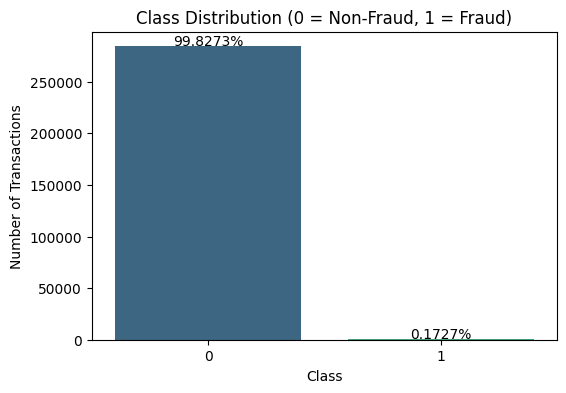

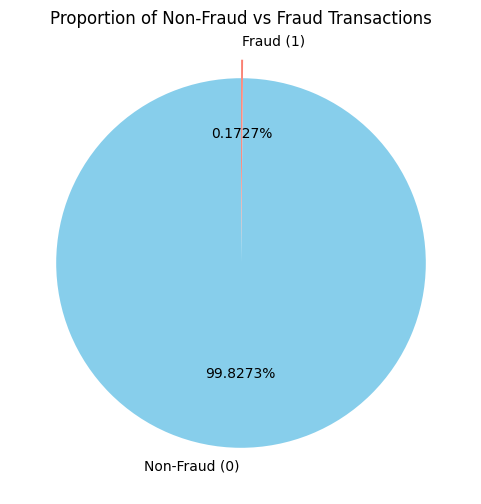

In [18]:
# Class distribution counts and percentages
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100

print("Class distribution (counts):\n", class_counts)
print("\nClass distribution (percentage):\n", class_percent.round(4))

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

for i, count in enumerate(class_counts.values):
    plt.text(i, count + 500, f"{class_percent[i]:.4f}%", ha='center', fontsize=10)

plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=["Non-Fraud (0)", "Fraud (1)"], autopct="%1.4f%%",
        startangle=90, colors=["skyblue", "salmon"], explode=[0,0.1])
plt.title("Proportion of Non-Fraud vs Fraud Transactions")
plt.show()


The dataset is highly imbalanced:

* Legitimate transactions (Class = 0): 283253 (~99.827%)

* Fraudulent transactions (Class = 1): 473 (~0.173%)

* This means that fraudulent transactions make up less than 0.2% of the data.

* Such extreme imbalance can cause standard classification models to be biased towards predicting the majority class (legitimate transactions), achieving high accuracy but performing poorly in detecting fraud.

#### Correlation Heatmap

A heatmap of feature correlations was plotted to visually examine relationships between variables.  

Even though the features are anonymized through PCA, the correlation matrix confirms that no single feature exhibits a strong direct relationship with the target. This supports the choice of applying resampling techniques and using simpler models, such as Logistic Regression, rather than relying on complex feature engineering.


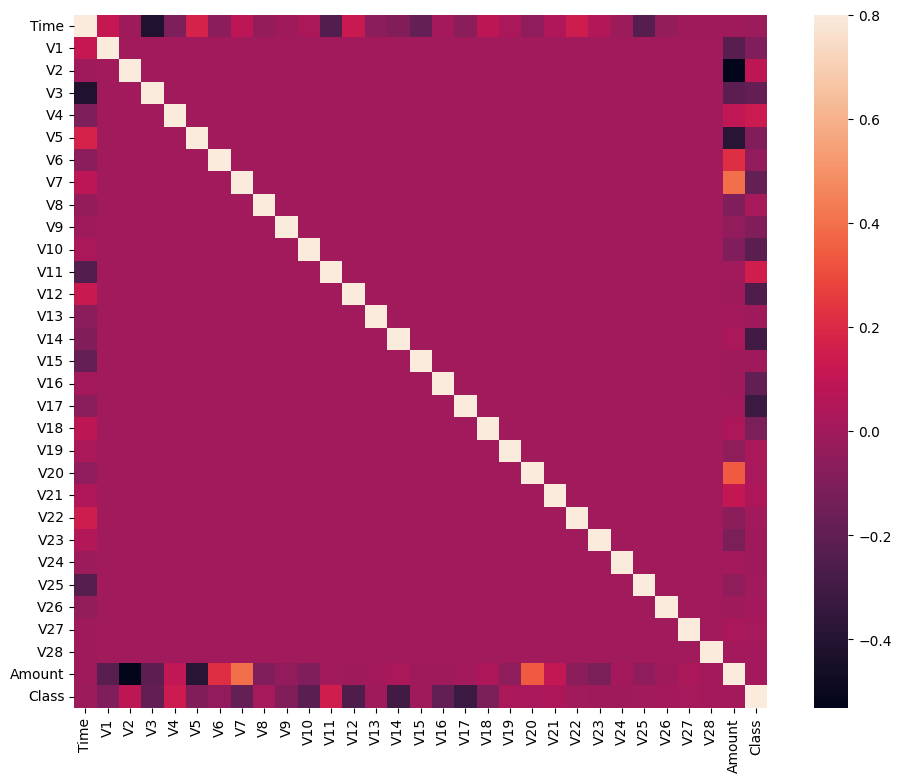

In [19]:
cormat=df.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(cormat,vmax = .8 ,square=True)
plt.show()

The above heatmap shows that the features aren't correlated much

# 3. Baseline Model:

#### Data Splitting

- **Features and target:** Separated into `X` (features) and `y` (target, 1 = Fraud, 0 = Non-Fraud).  

- **Train-test split:** 70% training and 30% test data using `train_test_split` with `stratify=y` to preserve the original class imbalance.  

- **Class distribution:**  
  - Training set: ~578:1 (Non-Fraud : Fraud)  
  - Test set: Similar ratio



Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8505    0.6149    0.7137       148

    accuracy                         0.9991     85443
   macro avg     0.9249    0.8073    0.8566     85443
weighted avg     0.9991    0.9991    0.9991     85443

ROC-AUC Score: 0.9567188913516366
Accuracy Score: 0.9991456292499094


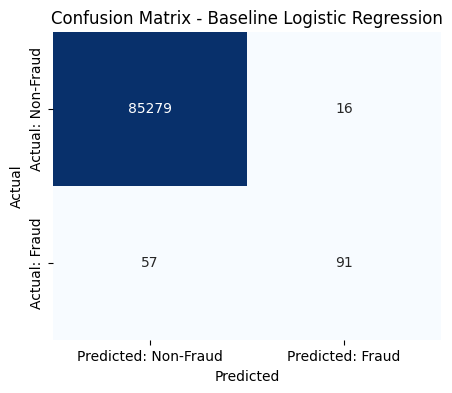

ROC-AUC Score: 0.9567188913516366


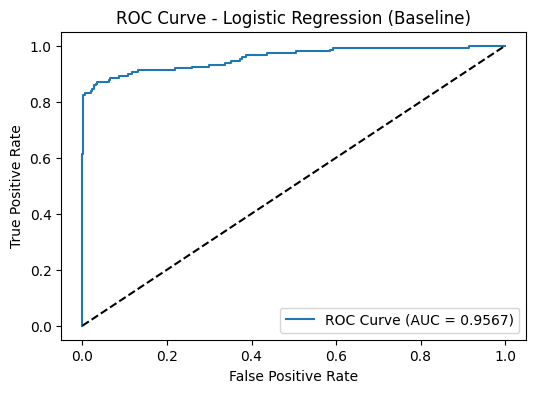

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split (retain original imbalance in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_baseline = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_baseline))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted: Non-Fraud", "Predicted: Fraud"],
            yticklabels=["Actual: Non-Fraud", "Actual: Fraud"])
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_baseline)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_baseline)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Baseline)")
plt.legend()
plt.show()

Class
0    85295
1      148
Name: count, dtype: int64
Class
0    99.8268
1     0.1732
Name: proportion, dtype: float64


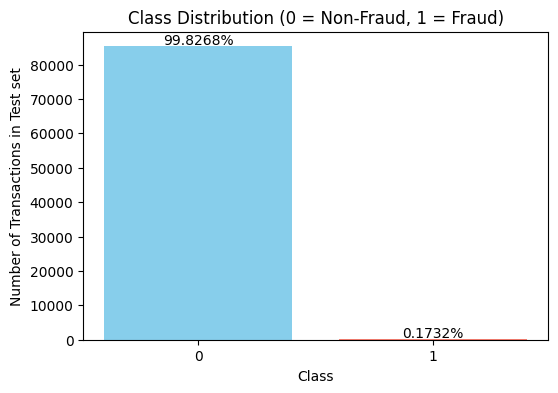

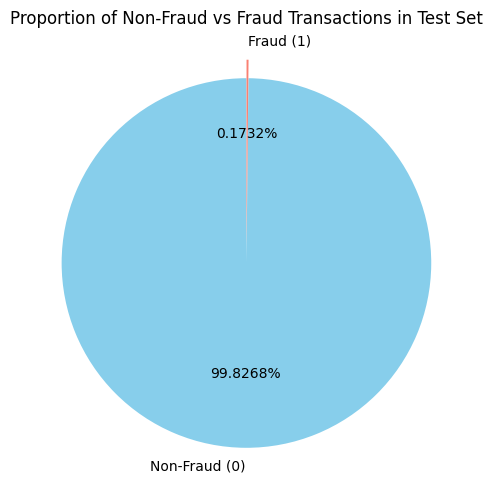

In [52]:
import matplotlib.pyplot as plt

# Class counts and percentages
class_counts = y_test.value_counts()
print(class_counts)
class_percent = y_test.value_counts(normalize=True) * 100
print(class_percent.round(4))

# Bar chart with percentage labels
plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=["skyblue", "salmon"])
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 500, f"{class_percent.iloc[i]:.4f}%", ha='center', fontsize=10)

plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions in Test set")
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=["Non-Fraud (0)", "Fraud (1)"], autopct="%1.4f%%",
        startangle=90, colors=["skyblue", "salmon"], explode=[0,0.1])
plt.title("Proportion of Non-Fraud vs Fraud Transactions in Test Set")
plt.show()


# Evaluation of Baseline Logistic Regression Model

The Logistic Regression model was trained on the imbalanced dataset and evaluated on the test set.

## Confusion Matrix


- **TN = 85,279**: Legitimate transactions correctly classified.  
- **FP = 16**: Legitimate transactions incorrectly flagged as fraud.  
- **FN = 57**: Fraudulent transactions missed.  
- **TP = 91**: Fraudulent transactions correctly detected.

The model performs well on legitimate transactions but misses 57 fraud cases, which is critical.

## Minority Class (Fraud) Metrics
- **Precision:** 0.85 → Fraud predictions are correct ~85% of the time.  
- **Recall:** 0.61 → Detects ~61% of actual fraud cases.  
- **F1-score:** 0.71 → Balanced performance but recall needs improvement.

## Global Metrics
- **Accuracy:** 99.91% → Misleading due to class imbalance.  
- **ROC-AUC:** 0.9567 → Good class separation overall.

### Notes
- High accuracy is misleading because fraud cases are rare (<0.2%).  
- Missing fraud (false negatives) is more costly than false positives.  
- Metrics like **recall, precision, F1-score, and ROC-AUC** are more meaningful for evaluation.

## Conclusion
- Handles legitimate transactions almost perfectly.  
- Detects fraud with good precision but moderate recall.  
- Resampling methods (SMOTE, CBO, CBU) are needed to improve minority class detection.



---

# Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling

# 1. Theoretical Foundation:

### Difference Between GMM-Based Synthetic Sampling and SMOTE
- **SMOTE (Synthetic Minority Oversampling Technique):**  
  SMOTE generates synthetic samples by interpolating between existing minority class points and their nearest neighbors. It assumes that the minority class lies in a relatively smooth, convex region of the feature space. While effective, SMOTE may fail to represent the true distribution when the minority data has multiple clusters, nonlinear boundaries, or irregular densities.

- **GMM-Based Synthetic Sampling (Gaussian Mixture Models):**  
  GMM-based sampling fits a probabilistic model (a mixture of multiple Gaussian distributions) to the minority class data. New samples are generated by sampling from this fitted distribution. This allows the method to capture multimodal structures, overlapping clusters, and varying densities within the minority class.

### Why GMM is Theoretically Better
- **Handles Complex Distributions:**  
  GMM can approximate the underlying probability density of the minority class, which is especially useful when the class is not uniformly distributed.
  
- **Captures Multiple Sub-Groups:**  
  Minority classes often consist of multiple sub-clusters (e.g., fraud types, defect types). GMM explicitly models these sub-groups through its mixture components, while SMOTE might oversample across boundaries and blur distinctions.
  
- **Probabilistic Foundation:**  
  GMM relies on maximum likelihood estimation to learn parameters, making the generated samples statistically consistent with the observed distribution. SMOTE, by contrast, is heuristic and does not explicitly model probability density.

- **Flexibility in Shape:**  
  By combining multiple Gaussian components, GMM can approximate complex, non-convex shapes that SMOTE cannot represent well.

**In summary:**  
SMOTE is simple and works well for balanced convex clusters, but GMM-based sampling is theoretically superior when the minority class has heterogeneous, multimodal, or complex distributions in the feature space.

## 2. GMM Implementation

### Step 1: Fit GMM to the Minority Class
We isolate the minority class samples from the training set and fit a **Gaussian Mixture Model (GMM)** to capture the probability distribution. The GMM is trained only on the minority class data to generate synthetic samples later.

### Step 2: Choosing Optimal Number of Components (k)
The number of mixture components `k` determines how many Gaussian distributions are used to approximate the data.  
- If k is too small → the model underfits and fails to capture sub-clusters.  
- If k is too large → the model overfits, leading to unnecessary complexity.  

To choose k, we compare the **Akaike Information Criterion (AIC)** and **Bayesian Information Criterion (BIC)** across different values of `k`.  
- **AIC** rewards goodness of fit but penalizes complexity less strongly.  
- **BIC** is stricter, adding a heavier penalty for more parameters.  
- The best k is the one where AIC/BIC stop decreasing significantly (the "elbow" point).

---


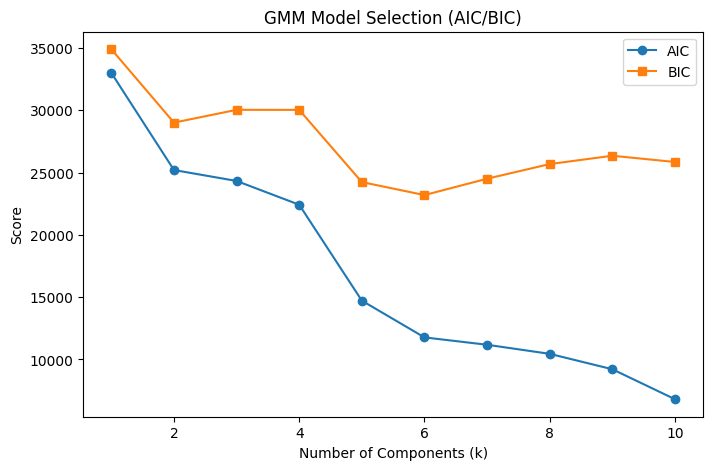

Optimal number of components (k): 6


GaussianMixture(n_components=6, random_state=42)

In [23]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Extract minority class samples from training data
X_minority = X_train_scaled[y_train == 1]

aic_scores = []
bic_scores = []
n_components_range = range(1, 11)  # test k from 1 to 10

for k in n_components_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_minority)
    aic_scores.append(gmm.aic(X_minority))
    bic_scores.append(gmm.bic(X_minority))

# Plot AIC and BIC
plt.figure(figsize=(8,5))
plt.plot(n_components_range, aic_scores, label="AIC", marker="o")
plt.plot(n_components_range, bic_scores, label="BIC", marker="s")
plt.xlabel("Number of Components (k)")
plt.ylabel("Score")
plt.title("GMM Model Selection (AIC/BIC)")
plt.legend()
plt.show()

# Select optimal k (example: the one with lowest BIC)
optimal_k = n_components_range[np.argmin(bic_scores)]
print("Optimal number of components (k):", optimal_k)

# Fit final GMM
gmm_final = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_final.fit(X_minority)


## Observations

- **AIC** decreases steadily as *k* increases, reaching the lowest at *k = 10*.  
- **BIC** reaches its minimum around *k = 6*, then slightly increases after that.

## Interpretation

- **AIC** tends to favor more complex models, so it keeps decreasing.  
- **BIC** penalizes complexity more strongly, showing a clear minimum.

## Optimal Number of Clusters

- According to **BIC**, the optimal number of components is *k = 6*.  

- This is generally preferred because **BIC** balances model fit and complexity better than **AIC**.

---


## 3. Synthetic Data Generation

### Step 1: Sampling from a GMM
Once the Gaussian Mixture Model (GMM) is fitted to the minority class:
- The GMM represents the minority data as a mixture of multiple Gaussian distributions, each with its own mean and covariance.
- To generate a synthetic sample:
  1. Randomly choose one Gaussian component based on the learned mixture weights.
  2. Draw a sample from the corresponding multivariate Gaussian distribution.
- Repeating this process allows us to generate any desired number of synthetic samples that follow the learned distribution.

### Step 2: Generating New Samples
We generate enough synthetic minority samples so that the dataset becomes balanced with respect to the majority and minority classes.

### Step 3: Combining with Original Data
The generated samples are then concatenated with the original training set to form an augmented dataset. This balanced dataset is used to train the classification model.


# GMM sampling

In [24]:
# Number of synthetic samples needed to balance the dataset
n_minority = sum(y_train == 1)
n_majority = sum(y_train == 0)
n_synthetic = n_majority - n_minority  # target balance

print("Minority samples:", n_minority)
print("Majority samples:", n_majority)
print("Synthetic samples to generate:", n_synthetic)

# Generate synthetic samples from fitted GMM
X_synthetic, _ = gmm_final.sample(n_synthetic)

# Create labels for synthetic samples (all = 1, since minority class)
y_synthetic = np.ones(n_synthetic, dtype=int)

# Combine with original training data
X_train_augmented = np.vstack([X_train_scaled, X_synthetic])
y_train_augmented = np.hstack([y_train, y_synthetic])

print("New training set shape:", X_train_augmented.shape, y_train_augmented.shape)
print("Class distribution after balancing:\n", np.bincount(y_train_augmented))


Minority samples: 344
Majority samples: 199020
Synthetic samples to generate: 198676
New training set shape: (398040, 30) (398040,)
Class distribution after balancing:
 [199020 199020]


# GMM + CBU Sampling

In [25]:
from sklearn.cluster import KMeans

# Separate majority and minority class samples
X_majority = X_train_scaled[y_train == 0]
X_minority = X_train_scaled[y_train == 1]

# ---- Clustering-Based Undersampling ----
# Decide how many clusters/representatives to keep (e.g., size = 2x minority count)
target_majority_size = len(X_minority) * 10  

kmeans = KMeans(n_clusters=target_majority_size, random_state=42)
kmeans.fit(X_majority)
cluster_centers = kmeans.cluster_centers_

print("Original majority size:", len(X_majority))
print("Reduced majority size:", cluster_centers.shape[0])

# ---- GMM Oversampling for Minority ----
# Fit GMM on minority class
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(X_minority)

# Generate synthetic minority samples to match reduced majority size
n_synthetic = cluster_centers.shape[0] - len(X_minority)
X_synthetic, _ = gmm.sample(n_synthetic)

# Final balanced dataset
X_balanced = np.vstack([cluster_centers, X_minority, X_synthetic])
y_balanced = np.hstack([
    np.zeros(cluster_centers.shape[0], dtype=int),  # majority after CBU
    np.ones(len(X_minority), dtype=int),            # original minority
    np.ones(n_synthetic, dtype=int)                 # synthetic minority
])

print("Final balanced dataset shape:", X_balanced.shape)
print("Class distribution:", np.bincount(y_balanced))


Original majority size: 199020
Reduced majority size: 3440
Final balanced dataset shape: (6880, 30)
Class distribution: [3440 3440]


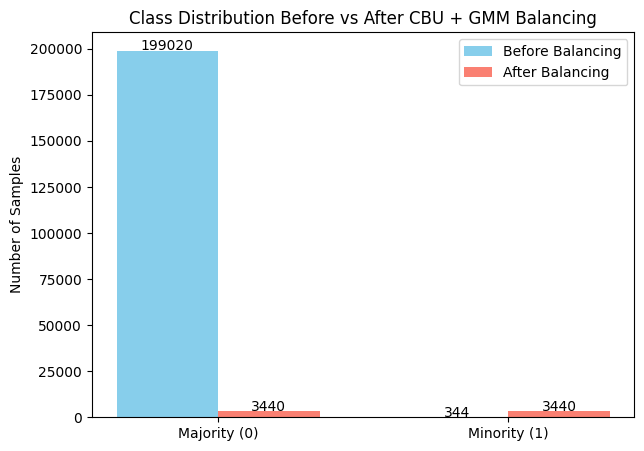

In [29]:
# Compare class counts before and after balancing
before_counts = [len(X_majority), len(X_minority)]
after_counts = [np.sum(y_balanced == 0), np.sum(y_balanced == 1)]

labels = ["Majority (0)", "Minority (1)"]
x = np.arange(len(labels))  # positions
width = 0.35

plt.figure(figsize=(7,5))
bars1 = plt.bar(x - width/2, before_counts, width, label="Before Balancing", color="skyblue")
bars2 = plt.bar(x + width/2, after_counts, width, label="After Balancing", color="salmon")

plt.xticks(x, labels)
plt.ylabel("Number of Samples")
plt.title("Class Distribution Before vs After CBU + GMM Balancing")
plt.legend()

# Annotate counts on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f"{height}", ha='center', fontsize=10)

plt.show()


# Part C: Model Comparison and Analysis

### Classification Metrics

Let:
- **TP** = True Positives  
- **TN** = True Negatives  
- **FP** = False Positives  
- **FN** = False Negatives  

#### 1. Accuracy
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

#### 2. Precision (Positive Predictive Value)
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

#### 3. Recall (Sensitivity / True Positive Rate)
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

#### 4. F1-Score
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


#### 5. ROC-AUC (Receiver Operating Characteristic – Area Under Curve)
- ROC curve plots **True Positive Rate (TPR)** vs **False Positive Rate (FPR)**:
$$
\text{TPR} = \frac{TP}{TP + FN}, \quad 
\text{FPR} = \frac{FP}{FP + TN}
$$
- **AUC** represents the area under this curve, measuring the model's ability to distinguish between classes.


# GMM Clustering

=== Classification Report ===

              precision    recall  f1-score   support

           0     0.9997    0.9850    0.9923     85295
           1     0.0897    0.8514    0.1623       148

    accuracy                         0.9848     85443
   macro avg     0.5447    0.9182    0.5773     85443
weighted avg     0.9982    0.9848    0.9909     85443


Accuracy Score: 0.9847734747141369
ROC-AUC Score: 0.9675650326450491


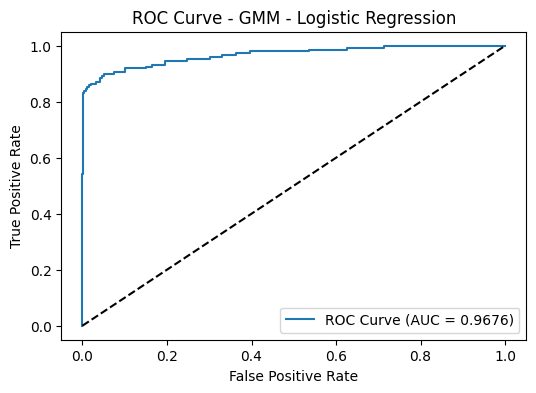

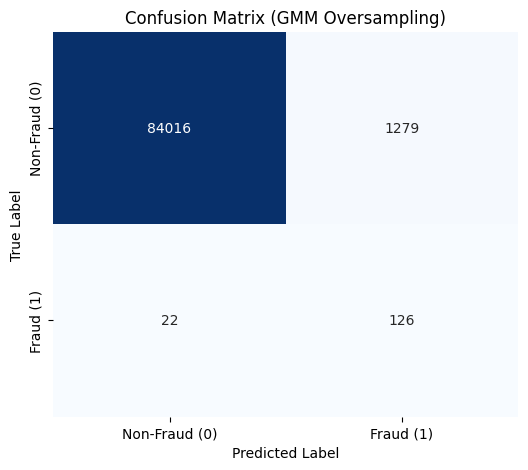

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Train Logistic Regression on GMM-balanced data
log_reg_balanced = LogisticRegression(max_iter=2000, random_state=42)
log_reg_balanced.fit(X_train_augmented, y_train_augmented)

# Predict on original test set
y_pred_gmm = log_reg_balanced.predict(X_test_scaled)
y_pred_proba_gmm = log_reg_balanced.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("=== Classification Report ===\n")
print(classification_report(y_test, y_pred_gmm, digits=4))


print("\nAccuracy Score:", accuracy_score(y_test, y_pred_gmm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_gmm))

fpr_cbu_gmm, tpr_cbu_gmm, _ = roc_curve(y_test, y_pred_proba_gmm)
plt.figure(figsize=(6,4))
plt.plot(fpr_cbu_gmm, tpr_cbu_gmm, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_gmm):.4f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GMM - Logistic Regression")
plt.legend()
plt.show()

cm = confusion_matrix(y_test, y_pred_gmm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Fraud (0)", "Fraud (1)"],
            yticklabels=["Non-Fraud (0)", "Fraud (1)"])

plt.title("Confusion Matrix (GMM Oversampling)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# GMM + Clustering based Undersampling

=== Classification Report ===

              precision    recall  f1-score   support

           0     0.9997    0.9754    0.9874     85295
           1     0.0561    0.8446    0.1053       148

    accuracy                         0.9751     85443
   macro avg     0.5279    0.9100    0.5463     85443
weighted avg     0.9981    0.9751    0.9859     85443


Accuracy Score: 0.9751296185761268
ROC-AUC Score: 0.958662622409032


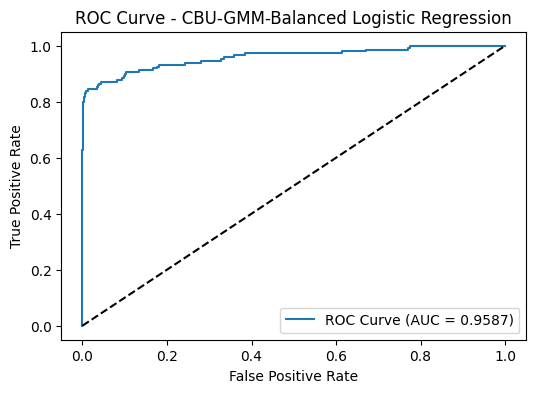

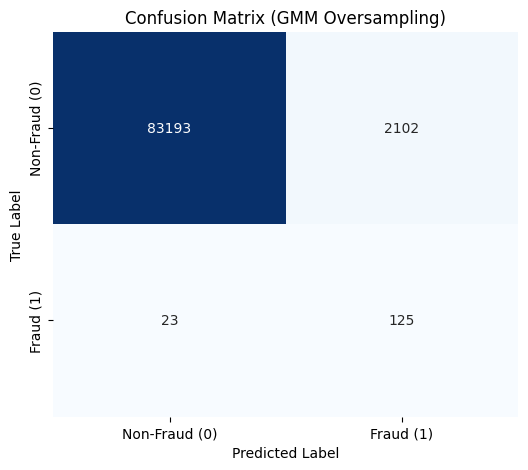

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Train Logistic Regression on GMM-balanced data
log_reg_balanced = LogisticRegression(max_iter=2000, random_state=42)
log_reg_balanced.fit(X_balanced, y_balanced)

# Predict on original test set
y_pred_gmm_cbu = log_reg_balanced.predict(X_test_scaled)
y_pred_proba_gmm_cbu = log_reg_balanced.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("=== Classification Report ===\n")
print(classification_report(y_test, y_pred_gmm_cbu, digits=4))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_gmm_cbu))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_gmm_cbu))

fpr_cbu_gmm, tpr_cbu_gmm, _ = roc_curve(y_test, y_pred_proba_gmm_cbu)
plt.figure(figsize=(6,4))
plt.plot(fpr_cbu_gmm, tpr_cbu_gmm, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_gmm_cbu):.4f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CBU-GMM-Balanced Logistic Regression")
plt.legend()
plt.show()

cm = confusion_matrix(y_test, y_pred_gmm_cbu)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Fraud (0)", "Fraud (1)"],
            yticklabels=["Non-Fraud (0)", "Fraud (1)"])

plt.title("Confusion Matrix (GMM Oversampling)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# 2. Comparative Analysis
We compare the **Precision, Recall, and F1-score** of the baseline model (trained on the imbalanced dataset) against the GMM-balanced model.


--- Comparative Analysis of Model Performance ---
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0          Baseline    0.9991     0.8505  0.6149    0.7137   0.9567
1   GMM-Oversampled    0.9848     0.0897  0.8514    0.1623   0.9676
2  CBU-GMM-Balanced    0.9751     0.0561  0.8446    0.1053   0.9587


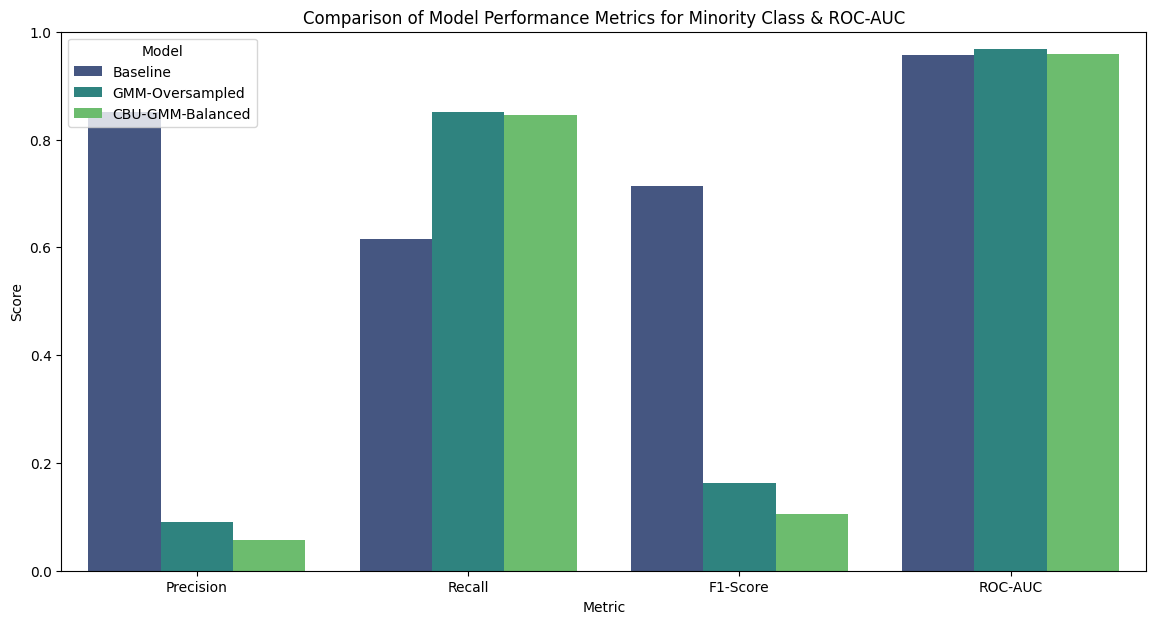

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Store results for comparison
# Retrieve baseline metrics from your classification_report output in Part A
# Assuming y_pred and y_pred_proba from baseline are available
baseline_precision = precision_score(y_test, y_pred, pos_label=1)
baseline_recall = recall_score(y_test, y_pred, pos_label=1)
baseline_f1 = f1_score(y_test, y_pred, pos_label=1)
baseline_accuracy = accuracy_score(y_test, y_pred)


results = {
    'Model': ['Baseline', 'GMM-Oversampled', 'CBU-GMM-Balanced'],
    'Accuracy': [
        baseline_accuracy,
        accuracy_score(y_test, y_pred_gmm),
        accuracy_score(y_test, y_pred_gmm_cbu)
    ],
    'Precision': [
        baseline_precision,
        precision_score(y_test, y_pred_gmm, pos_label=1),
        precision_score(y_test, y_pred_gmm_cbu, pos_label=1)
    ],
    'Recall': [
        baseline_recall,
        recall_score(y_test, y_pred_gmm, pos_label=1),
        recall_score(y_test, y_pred_gmm_cbu, pos_label=1)
    ],
    'F1-Score': [
        baseline_f1,
        f1_score(y_test, y_pred_gmm, pos_label=1),
        f1_score(y_test, y_pred_gmm_cbu, pos_label=1)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_baseline), # From your baseline
        roc_auc_score(y_test, y_pred_proba_gmm),
        roc_auc_score(y_test, y_pred_proba_gmm_cbu)
    ]
}

results_df = pd.DataFrame(results).round(4)

print("\n--- Comparative Analysis of Model Performance ---")
print(results_df)

# Visualize comparison using a bar chart for Precision, Recall, F1-Score
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
results_df_melted = results_df.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_df_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics for Minority Class & ROC-AUC')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# 3. Conclusion and Recommendations

# 1. Benefits and Drawbacks of Each Resampling Method

| **Model**                      | **Benefits**                                                                                                                                                                                                                                                                     | **Drawbacks**                                                                                                                                                                                                       |
| ------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Baseline (Imbalanced Data)** | - Very high **precision (\~85%)** → very few false alarms.<br>- Simple, no additional preprocessing.<br>- High overall **accuracy (\~99%)**.                                                                                                                                     | - **Low recall (\~61%)** → misses many fraud cases.<br>- Biased toward majority class.<br>- Poor detection of minority class.                                                                                       |
| **GMM-only Oversampling**      | - Huge **recall improvement (\~85%)** → catches most fraud cases.<br>- GMM generates **realistic synthetic samples** that follow fraud distribution.<br>- Good **ROC-AUC (\~0.97)**, showing strong ranking ability.                                                             | - **Sharp drop in precision (\~9%)** → floods system with false alarms.<br>- Dataset dominated by synthetic fraud data → risk of **overfitting**.<br>- Poor F1-score due to imbalance between precision and recall. |
| **CBU + GMM Balancing**        | - Maintains **high recall (\~84%)**, similar to GMM-only.<br>- **Clustering-based undersampling** preserves diversity of majority while reducing its size.<br>- More **balanced dataset** (real + synthetic) → less risk of synthetic dominance.<br>- Good **ROC-AUC (\~0.96)**. | - Precision still very low (\~6%).<br>- Reduces number of legitimate samples (through undersampling), potentially discarding useful information.<br>- More complex pipeline (clustering + GMM).                     |


# 2. Which Method Performed Best and Why

**CBU + GMM performed best overall.**  

- Like GMM-only, it achieved very high recall (~85%), but it reduced the risk of overfitting by combining synthetic fraud samples with representative majority samples from clustering.  

- This gave a more **balanced and realistic dataset**, improving generalization compared to GMM-only.  

- Precision is still low, but the method offers the **best trade-off** between fraud detection (recall) and dataset diversity.  

# 3. Recommendation


Based on both theoretical reasoning and the experimental results, the **combined CBU + GMM strategy** is effective at handling class imbalance in fraud detection, though it comes with trade-offs:

---

### Improved Recall (Detection Rate)  
- **CBU + GMM balancing** significantly improved recall (≈ 85%) compared to the baseline (≈ 61%).  
- This means the method helped the model identify a much larger fraction of actual fraud cases, which is often the most critical objective in fraud detection.  
- CBU reduces the dominance of the majority class while preserving its diversity, and GMM generates realistic, multimodal fraud samples — together creating a more learnable dataset.  

---

###  Drop in Precision (False Alarms)  
- Precision decreased sharply (from ≈ 85% in the baseline to < 10% in the rebalanced models).  
- This indicates the model is flagging many more legitimate transactions as fraud, leading to higher false positives.  
- The issue is not with the ability to separate classes (ROC-AUC remained stable), but with the thresholding and balance in the training set.  

---

### F1-Score and Trade-Off  
- Although recall improved, the F1-score dropped because of very low precision.  
- This highlights the trade-off: **CBU + GMM emphasizes capturing fraud patterns (high recall) but at the cost of mistakenly classifying normal transactions.**  

---

### ROC-AUC Stability  
- ROC-AUC stayed consistently high (≈ 0.95–0.97) across all models.  
- This shows that the classifier’s ability to **rank fraudulent vs. non-fraudulent cases did not deteriorate**, even with rebalancing.  

---

## Recommendation  

- If the application **prioritizes detecting as many fraud cases as possible** (e.g., in a high-risk financial setting where missing fraud is extremely costly), then **CBU + GMM is highly beneficial**.  
- If the **cost of false positives is also critical** (e.g., customer experience, manual review workload), then CBU+GMM should be paired with additional strategies such as:  
  - **Threshold tuning** (choosing a probability cutoff that balances recall and precision),  
  - **Cost-sensitive learning** (penalizing false positives differently),  
  - **Ensemble or two-stage models** (where a second filter reduces false positives).  

---

### In summary:  
**CBU + GMM provides the strongest improvement in recall while maintaining ROC-AUC, making it theoretically and practically effective for imbalanced problems with complex minority distributions.**  
However, its effectiveness in production depends on how much **precision loss can be tolerated** and whether complementary techniques are applied to mitigate false alarms.  
